In [395]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [31]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 5*X+10+np.random.randn(100, 1)
X_new = np.c_[np.ones((100, 1)), X]
the = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)

X1 = np.array([[0], [2]])
X2 = np.c_[np.ones((2, 1)), X1]
y_pred = X2.dot(the)
y_pred

array([[ 9.97439853],
       [20.33180583]])

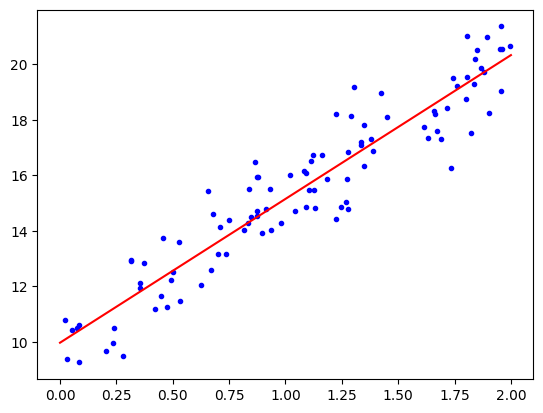

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.plot(X1, y_pred, 'r-')


In [34]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X, y)
sgd.predict(X1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [41]:
SGDRegressor??

In [91]:
pd.concat([clean_df, test_df])

CRIM  ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
1    0.00632  18  2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
2    0.02731   0  7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
3    0.02729   0  7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
4    0.03237   0  2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
5    0.06905   0  2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   
..       ...  ..   ...  ...    ...    ...   ...     ...  ..  ...     ...   
66   0.03584  80  3.37    0  0.398   6.29  17.8  6.6115   4  337    16.1   
451  6.71772   0  18.1    0  0.713  6.749  92.6  2.3236  24  666    20.2   
60   0.10328  25  5.13    0  0.453  5.927  47.2   6.932   8  284    19.7   
291  0.03502  80  4.95    0  0.411  6.861  27.9  5.1167   4  245    19.2   
88   0.07151   0  4.49    0  0.449  6.121  56.8  3.7476   3  247    18.5   

          B  LSTAT  MEDV  
1     396.9   4.98    24  
2     396.9   9.14  21.6  
3    392.83   4.03  34.7  
4    394.63   2.94  33.4  
5     396.9   5.33  36.2  
..      ...    ...   ...  
66    396.9   4.67  23.5  
451    0.32  17.44  13.4  
60    396.9   9.22  19.6  
291   396.9   3.33  28.5  
88   395.15   8.44  22.2  

[607 rows x 14 columns]

In [371]:
import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


with open("../jupyter/resource.h5", "rb") as f:
    datasets = pickle.load(f)

df = pd.DataFrame(datasets["boston_house_prices"])
columns = df.loc[0, ].tolist()
df.columns = columns
clean_df = df.drop(0)
# 80%训练；20%测试
test_df = clean_df.sample(frac=0.2)
train_df = pd.concat([clean_df, test_df]).drop_duplicates(keep=False)
y_train = train_df["MEDV"]
X_train = train_df.drop("MEDV", axis=1)
y_test = test_df["MEDV"]
X_test = test_df.drop("MEDV", axis=1)


lr = LinearRegression()
lr.fit(X_train, y_train)
# 用测试数据评估模型
y_pred = lr.predict(X_test)
# MSE ==> RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

4.16835260117059

In [97]:
SGDRegressor??

In [142]:
from sklearn.linear_model import SGDRegressor, LinearRegression

sgd = SGDRegressor(alpha=0.0001)
sgd.fit(X_train, y_train)
y_pred1 = sgd.predict(X_test)
mean_squared_error(y_test, y_pred1)

1.5453902009551904e+27

In [89]:
lr.intercept_, lr.coef_

(27.777897099138656,
 array([-9.21032440e-02,  4.09760195e-02,  6.81338773e-02,  2.26362500e+00,
        -1.54466296e+01,  4.54715038e+00, -2.39109543e-03, -1.31888885e+00,
         3.09951562e-01, -1.22382904e-02, -9.07943138e-01,  1.22331815e-02,
        -5.30352531e-01]))

In [169]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr1 = LinearRegression()
lr1.fit(X_train_poly, y_train)
y_pred_poly = lr1.predict(X_test_poly)
np.sqrt(mean_squared_error(y_test, y_pred_poly))

3.1825948209186006

In [162]:
y_train_predict = lr1.predict(X_train_poly)
np.sqrt(mean_squared_error(y_train, y_train_predict))

2.7184992960016405

# 逻辑回归

In [192]:
with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)

In [193]:
datasets.keys()

dict_keys(['titanic_train', 'titanic_predict', 'kmeans', 'iris_data', 'digits', 'cancer', 'boston_house_prices', 'generated_data', 'examdata', 'chip_test', 'UCI_Credit_Card', 'SMSSpamCollection'])

In [247]:
exam_df = datasets["examdata"]
exam_df.sort_values("Exam1").info()
exam_df.info()
exam_df.describe()
exam_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 63 to 75
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam1   100 non-null    float64
 1   Exam2   100 non-null    float64
 2   Pass    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam1   100 non-null    float64
 1   Exam2   100 non-null    float64
 2   Pass    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Exam1      Exam2  Pass
0  34.623660  78.024693     0
1  30.286711  43.894998     0
2  35.847409  72.902198     0
3  60.182599  86.308552     1
4  79.032736  75.344376     1

In [250]:
type(X)

pandas.core.frame.DataFrame

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = exam_df["Pass"]
X = exam_df.drop("Pass", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


score_list = []
for i in range(10, 500, 1):
    lr = LogisticRegression(max_iter=i, n_jobs=6)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(i, score)
    score_list.append((i, score))
score_list.sort(key=lambda x:x[-1], reverse=True)
score_list

In [253]:
iris = datasets["iris_data"].drop("label",axis=1)
iris["target"] = iris["target"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
iris

sepal length  sepal width  petal length  petal width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

In [255]:
mnist = datasets["digits"]
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8], dtype=int32),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10., 

In [259]:
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

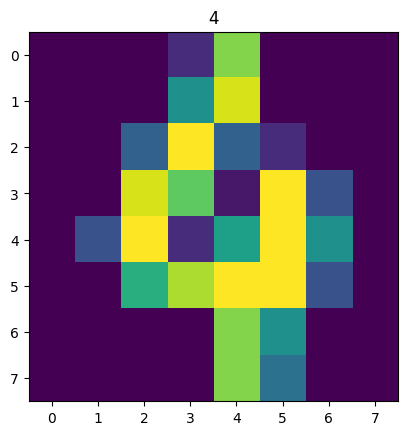

In [271]:
import matplotlib.pyplot as plt

plt.imshow(mnist["data"][100].reshape(8, 8))
plt.title(mnist["target"][100])
plt.show()

In [273]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [275]:
X = pd.DataFrame(mnist["data"], columns=mnist["feature_names"])
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
lr = LogisticRegression()
score_list = []
for i in range(10, 500, 1):
    lr = LogisticRegression(max_iter=i, n_jobs=6)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(i, score)
    score_list.append((i, score))
score_list.sort(key=lambda x:x[-1], reverse=True)
score_list

In [306]:
lr = LogisticRegression(max_iter=69, n_jobs=6)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
lr.predict([X_test.iloc[0, ], X_test.iloc[1, ]])

0.9777777777777777


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([9, 9])

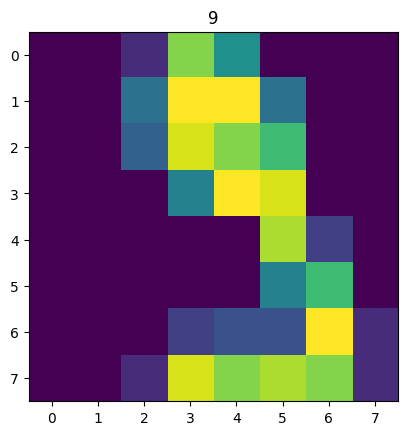

In [304]:
plt.imshow(np.array(X_test.iloc[1, ]).reshape(8, 8))
plt.title(y_test[1])
plt.show()

In [ ]:
y_pred = lr.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

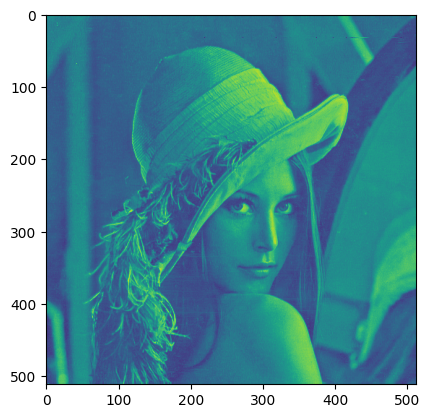

In [301]:
from PIL import Image

plt.imshow(np.array(Image.open("./demo.png"))[:,:,2])
plt.show()

In [ ]:
plt.imshow()

In [317]:
X = pd.DataFrame(mnist["data"], columns=mnist["feature_names"])
y = mnist["target"]
X_std = X/255.0
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=100)
lr = LogisticRegression()
score_list = []
for i in range(10, 500, 1):
    lr = LogisticRegression(max_iter=i, n_jobs=6)
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    score = accuracy_score(y_test, y_pred)
    print(i, score)
    score_list.append((i, score))
score_list.sort(key=lambda x:x[-1], reverse=True)
score_list

10 0.8981481481481481
11 0.9018518518518519
12 0.9
13 0.9
14 0.8925925925925926
15 0.8925925925925926
16 0.8925925925925926
17 0.8925925925925926
18 0.8925925925925926
19 0.8925925925925926
20 0.8925925925925926
21 0.8925925925925926
22 0.8925925925925926
23 0.8925925925925926
24 0.8925925925925926
25 0.8925925925925926
26 0.8925925925925926
27 0.8925925925925926
28 0.8925925925925926
29 0.8925925925925926
30 0.8925925925925926
31 0.8925925925925926
32 0.8925925925925926
33 0.8925925925925926
34 0.8925925925925926
35 0.8925925925925926
36 0.8925925925925926
37 0.8925925925925926
38 0.8925925925925926
39 0.8925925925925926
40 0.8925925925925926
41 0.8925925925925926
42 0.8925925925925926
43 0.8925925925925926
44 0.8925925925925926
45 0.8925925925925926
46 0.8925925925925926
47 0.8925925925925926
48 0.8925925925925926
49 0.8925925925925926
50 0.8925925925925926
51 0.8925925925925926
52 0.8925925925925926
53 0.8925925925925926
54 0.8925925925925926
55 0.8925925925925926
56 0.8925925925925

373 0.8925925925925926
374 0.8925925925925926
375 0.8925925925925926
376 0.8925925925925926
377 0.8925925925925926
378 0.8925925925925926
379 0.8925925925925926
380 0.8925925925925926
381 0.8925925925925926
382 0.8925925925925926
383 0.8925925925925926
384 0.8925925925925926
385 0.8925925925925926
386 0.8925925925925926
387 0.8925925925925926
388 0.8925925925925926
389 0.8925925925925926
390 0.8925925925925926
391 0.8925925925925926
392 0.8925925925925926
393 0.8925925925925926
394 0.8925925925925926
395 0.8925925925925926
396 0.8925925925925926
397 0.8925925925925926
398 0.8925925925925926
399 0.8925925925925926
400 0.8925925925925926
401 0.8925925925925926
402 0.8925925925925926
403 0.8925925925925926
404 0.8925925925925926
405 0.8925925925925926
406 0.8925925925925926
407 0.8925925925925926
408 0.8925925925925926
409 0.8925925925925926
410 0.8925925925925926
411 0.8925925925925926
412 0.8925925925925926
413 0.8925925925925926
414 0.8925925925925926
415 0.8925925925925926
416 0.89259

[(11, 0.9018518518518519),
 (12, 0.9),
 (13, 0.9),
 (10, 0.8981481481481481),
 (14, 0.8925925925925926),
 (15, 0.8925925925925926),
 (16, 0.8925925925925926),
 (17, 0.8925925925925926),
 (18, 0.8925925925925926),
 (19, 0.8925925925925926),
 (20, 0.8925925925925926),
 (21, 0.8925925925925926),
 (22, 0.8925925925925926),
 (23, 0.8925925925925926),
 (24, 0.8925925925925926),
 (25, 0.8925925925925926),
 (26, 0.8925925925925926),
 (27, 0.8925925925925926),
 (28, 0.8925925925925926),
 (29, 0.8925925925925926),
 (30, 0.8925925925925926),
 (31, 0.8925925925925926),
 (32, 0.8925925925925926),
 (33, 0.8925925925925926),
 (34, 0.8925925925925926),
 (35, 0.8925925925925926),
 (36, 0.8925925925925926),
 (37, 0.8925925925925926),
 (38, 0.8925925925925926),
 (39, 0.8925925925925926),
 (40, 0.8925925925925926),
 (41, 0.8925925925925926),
 (42, 0.8925925925925926),
 (43, 0.8925925925925926),
 (44, 0.8925925925925926),
 (45, 0.8925925925925926),
 (46, 0.8925925925925926),
 (47, 0.8925925925925926),
 (48

In [315]:
X_test_std.iloc[1, ]

pixel_0_0    0.000000
pixel_0_1    0.000000
pixel_0_2    0.007843
pixel_0_3    0.050980
pixel_0_4    0.031373
               ...   
pixel_7_3    0.058824
pixel_7_4    0.050980
pixel_7_5    0.054902
pixel_7_6    0.050980
pixel_7_7    0.007843
Name: 31, Length: 64, dtype: float64

In [ ]:
plt.imshow()

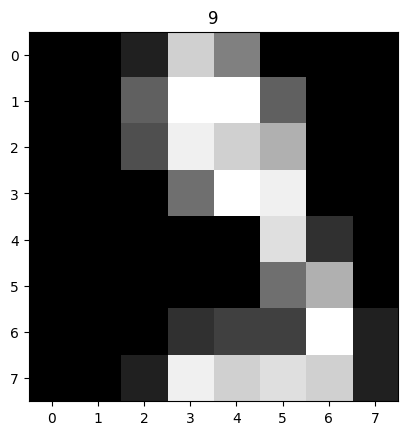

In [316]:
plt.imshow(np.array(X_test_std.iloc[1, ]).reshape(8, 8), cmap='gray')
plt.title(y_test[1])
plt.show()

# 决策树

**信息熵**
- 信息论里的概念，香农提出
- 描述混乱程度的度量
- 取值范围0~1，值越大，越混乱
- 计算公式：
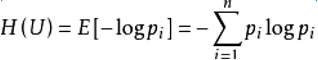

**有一堆苹果和梨共100个，随机拿出一个，拿出的是哪种？**
- 50个苹果+50个梨子
- 0个苹果+100个梨子
- 80个苹果+20个梨子
- E1=-50/100*log(50/100,2) – 50/100*log(50/100,2) = 1
- E2=- 100/100*log(100/100,2)=0
- E3=-20/100*log(20/100,2) – 80/100*log(80/100,2) = 0.722

**信息增益**
- 信息是确定性的增加
- 从一个状态到另一个状态信息的变化
- 信息增益越大，对确定性贡献越大

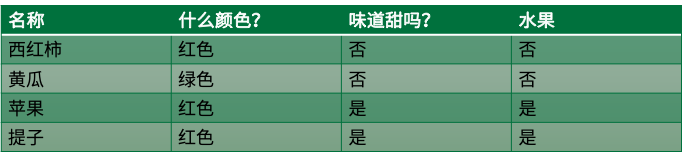


**不考虑任何特征，直接去估计结果：**
- 其中，两个是水果，两个不是水果，概率均为2/4：
      E=-2/4*log(2/4,2) – 2/4*log(2/4,2)=1

**考虑以颜色为参考信息，判断是否为水果：**
- 其中，红色的有3个,2个是水果，一个不是，绿色的都不是，概率分别为：2/3,1/3  以及 1, 0
      E=3/4*(-2/3*log(2/3,2) – 1/3*log(1/3,2)) + 1/4*(-1*log(1,2)) = 0.689

**考虑以味道为参考信息，判断是否为水果：**
- 其中，甜味的2个，全是水果，不甜的2个，全不是水果，概率分别为：1,0  以及 0,1
      E=2/4*(-2/2*log(2/2,2)) + 2/4*(-2/2*log(2/2,2)) = 0

**信息增益：**
-    颜色： 1-0.689=0.311
-    味道： 1-0=1


In [ ]:
# entropy; gini

In [319]:
from sklearn.tree import DecisionTreeClassifier

X = pd.DataFrame(mnist["data"], columns=mnist["feature_names"])
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
score_list = []
for criterion in ["entropy", "gini"]:
    for max_depth in range(10, 100, 5):
        dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        dt.fit(X_train, y_train)
        score = dt.score(X_test, y_test)
        score_list.append([criterion, max_depth, score])
score_list.sort(key=lambda x:x[-1], reverse=True)
score_list

In [343]:
from sklearn.ensemble import RandomForestClassifier

for estimator in range(10, 500, 100):
    for criterion in ["entropy", "gini"]:
        for max_depth in range(10, 100, 5):    
            rf = RandomForestClassifier(n_estimators=estimator, criterion=criterion, max_depth=max_depth)
            rf.fit(X_train, y_train)
            score = rf.score(X_test, y_test)
            score_list.append([estimator, criterion, max_depth, score])

In [345]:
score_list.sort(key=lambda x:x[-1], reverse=True)
score_list

[[110, 'entropy', 85, 0.9777777777777777],
 [210, 'gini', 65, 0.975925925925926],
 [310, 'entropy', 15, 0.975925925925926],
 [310, 'entropy', 25, 0.975925925925926],
 [110, 'entropy', 15, 0.9740740740740741],
 [110, 'entropy', 50, 0.9740740740740741],
 [110, 'entropy', 75, 0.9740740740740741],
 [110, 'gini', 15, 0.9740740740740741],
 [110, 'gini', 65, 0.9740740740740741],
 [110, 'gini', 95, 0.9740740740740741],
 [210, 'entropy', 35, 0.9740740740740741],
 [210, 'entropy', 65, 0.9740740740740741],
 [210, 'gini', 55, 0.9740740740740741],
 [210, 'gini', 80, 0.9740740740740741],
 [210, 'gini', 90, 0.9740740740740741],
 [310, 'entropy', 70, 0.9740740740740741],
 [310, 'gini', 30, 0.9740740740740741],
 [310, 'gini', 85, 0.9740740740740741],
 [410, 'entropy', 10, 0.9740740740740741],
 [410, 'entropy', 65, 0.9740740740740741],
 [410, 'entropy', 80, 0.9740740740740741],
 [410, 'entropy', 90, 0.9740740740740741],
 [110, 'entropy', 10, 0.9722222222222222],
 [110, 'entropy', 65, 0.9722222222222222]

In [539]:
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# 短信数据集
with open("./resource.h5", 'rb') as f:
    datasets = pickle.load(f)
df = datasets["SMSSpamCollection"]
# 训练一个垃圾短信检测的模型
y = df["label"].map({"ham":0, "spam":1})
cv = CountVectorizer()
X = cv.fit_transform(df["message"])
X_train, X_test, y_train, y_test, train_test_split(X, y, test_size=0.3, random_state=100)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_score = lg.score(X_test, y_test)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_score = sgd.score(X_test, y_test)
print("决策树算法的准确率是：", dt_score)
print("逻辑回归算法的准确率是：", lg_score)
print("SGD回归算法的准确率是：", sgd_score)

决策树算法的准确率是： 0.9712849964106246
逻辑回归算法的准确率是： 0.9856424982053122
SGD回归算法的准确率是： 0.9849246231155779


In [363]:
count_vector.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [365]:
sorted(count_vector.vocabulary_.items(), key=lambda x:x[-1])

[('00', 0),
 ('000', 1),
 ('000pes', 2),
 ('008704050406', 3),
 ('0089', 4),
 ('0121', 5),
 ('01223585236', 6),
 ('01223585334', 7),
 ('0125698789', 8),
 ('02', 9),
 ('0207', 10),
 ('02072069400', 11),
 ('02073162414', 12),
 ('02085076972', 13),
 ('021', 14),
 ('03', 15),
 ('04', 16),
 ('0430', 17),
 ('05', 18),
 ('050703', 19),
 ('0578', 20),
 ('06', 21),
 ('07', 22),
 ('07008009200', 23),
 ('07046744435', 24),
 ('07090201529', 25),
 ('07090298926', 26),
 ('07099833605', 27),
 ('07123456789', 28),
 ('0721072', 29),
 ('07732584351', 30),
 ('07734396839', 31),
 ('07742676969', 32),
 ('07753741225', 33),
 ('0776xxxxxxx', 34),
 ('07781482378', 35),
 ('07786200117', 36),
 ('077xxx', 37),
 ('078', 38),
 ('07801543489', 39),
 ('07808', 40),
 ('07808247860', 41),
 ('07808726822', 42),
 ('07815296484', 43),
 ('07821230901', 44),
 ('078498', 45),
 ('07880867867', 46),
 ('0789xxxxxxx', 47),
 ('07946746291', 48),
 ('0796xxxxxx', 49),
 ('07973788240', 50),
 ('07xxxxxxxxx', 51),
 ('08', 52),
 ('080

In [383]:
df = datasets["SMSSpamCollection"]

In [415]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)
df = datasets["SMSSpamCollection"]
count_vector = CountVectorizer()
data = count_vector.fit_transform(df['message'])
df["label"] = df["label"].map({"ham":0, "spam":1})

X_train, X_test, y_train, y_test = train_test_split(data, df['label'], random_state=42)

print('总的短信数量：{}'.format(df.shape[0]))
print('训练集短信数量：{}'.format(X_train.shape[0]))
print('测试集短信数量：{}'.format(X_test.shape[0]))
from sklearn.ensemble import AdaBoostClassifier
naive_byes = AdaBoostClassifier(n_estimators=50)
naive_byes.fit(X_train, y_train)

predictions = naive_byes.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score:", format(accuracy_score(y_test, predictions)))
print("precision_score:", format(precision_score(y_test, predictions)))
print("recall_score:", format(recall_score(y_test, predictions)))
print("f1_score:", format(f1_score(y_test, predictions)))


总的短信数量：5572
训练集短信数量：4179
测试集短信数量：1393
Accuracy score: 0.9770279971284996
precision_score: 0.963855421686747
recall_score: 0.8602150537634409
f1_score: 0.909090909090909


In [679]:
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)
df = datasets["titanic_train"]
d = dict(df["Embarked"].value_counts())
target = sorted(d.items(), key=lambda x:x[-1], reverse=True)[0][0]
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(target)
df = df.drop("Cabin", axis=1)
y = df["Survived"]
feature_names = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]
features = df[feature_names]
ohe = OneHotEncoder()
sex = ohe.fit_transform(features[["Sex", "Embarked"]]).toarray()
feature_names1  = ohe.get_feature_names_out()
features1 = pd.DataFrame(data=sex, columns=feature_names1)
X = pd.merge(left=features, right=features1, left_index=True, right_index=True).drop(["Sex", "Embarked"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
dt = DecisionTreeClassifier()
sgd = SGDClassifier()
lg = LogisticRegression(max_iter=1000)
for name , model in {"决策树":dt, "SGD":sgd, "逻辑回归":lg}.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(name+"算法的准确率为：", score)

决策树算法的准确率为： 0.7835820895522388
SGD算法的准确率为： 0.7686567164179104
逻辑回归算法的准确率为： 0.7947761194029851


In [626]:
# K-Fold
# k1  k2  k3  k4  k5
#1.[k1]   --score1
#2.[k2]   --score2
#...
#5.[k5]   --score5

In [701]:
from sklearn.model_selection import cross_val_score

cross_val_score(lg, X, y, cv=5, n_jobs=6).mean()

0.7867679367271357

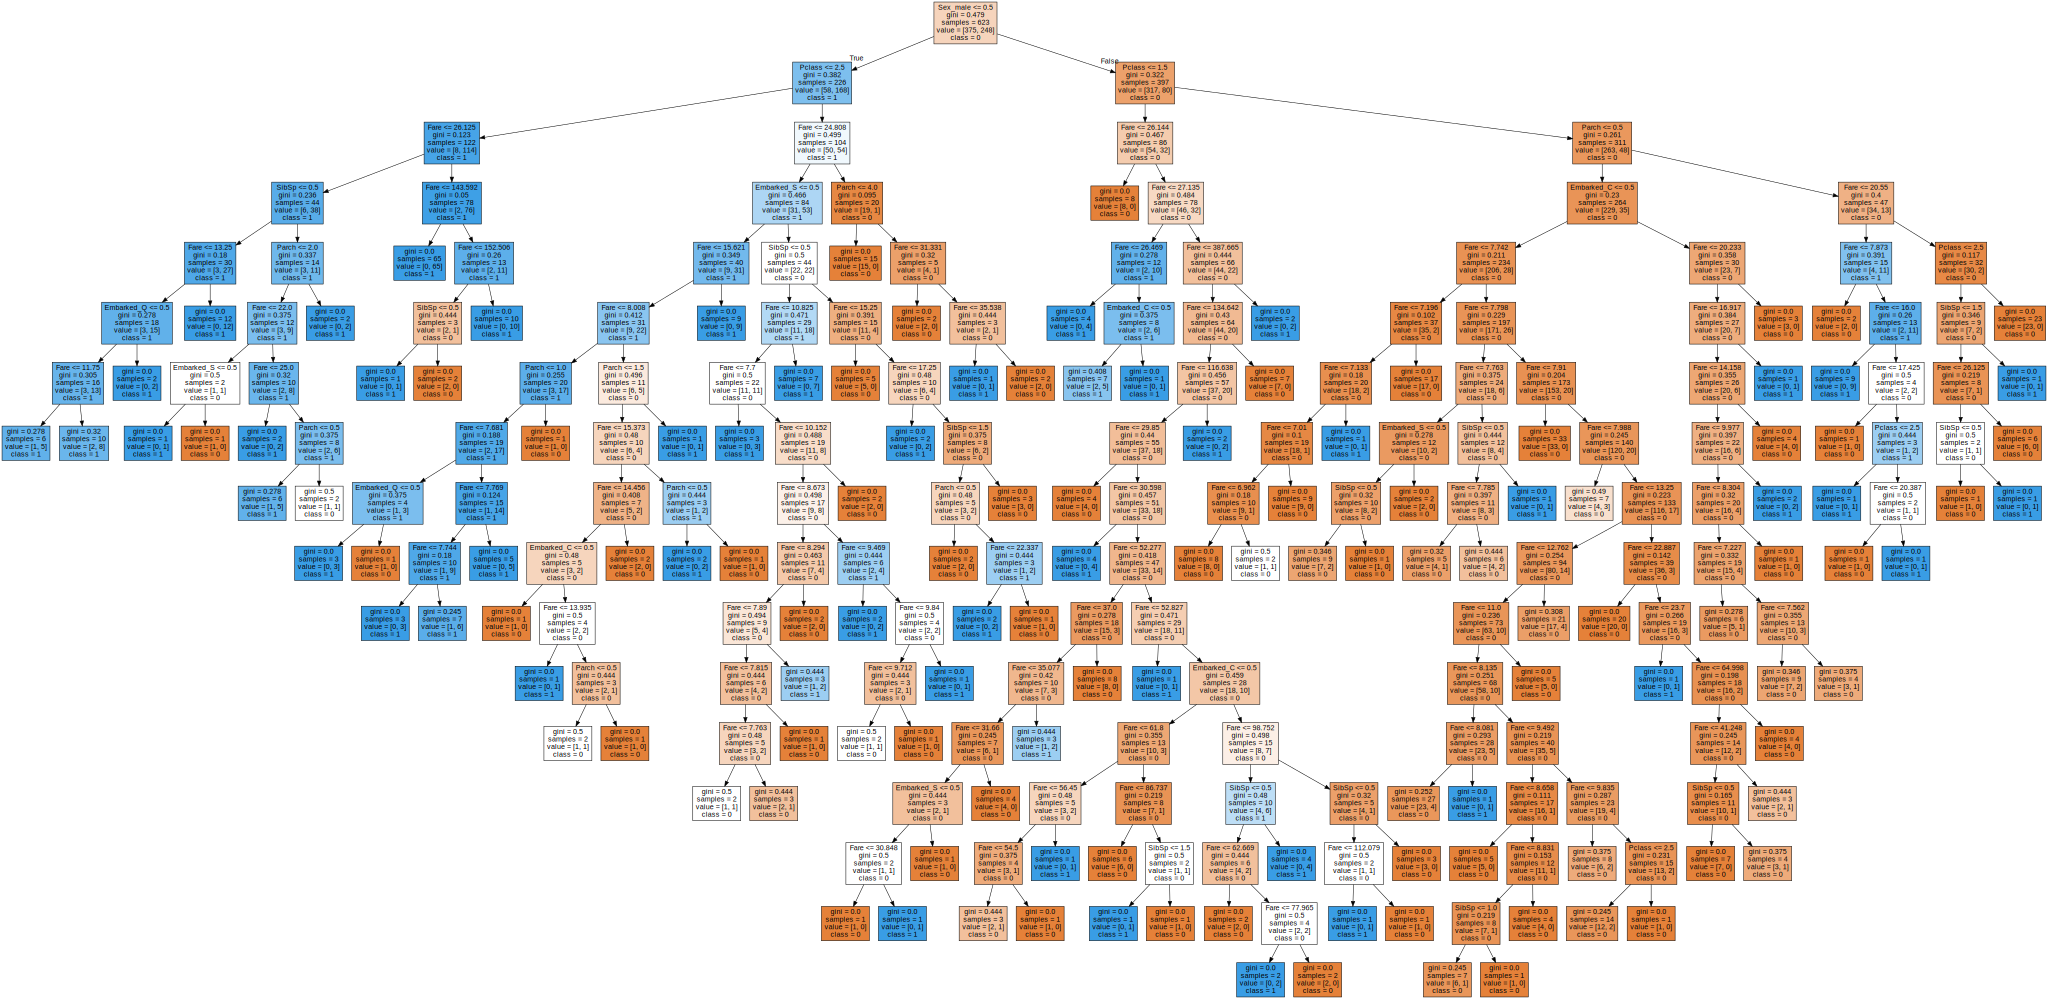

In [705]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(dt,
    out_file="tree.dot",
    feature_names=X.columns,
    class_names=["0", "1"],
    label='all',
    filled=True)

Source.from_file("./tree.dot")

In [704]:
!dot -Tpng tree.dot -o tree.png

In [577]:
le = LabelEncoder()
embarked = le.fit_transform(features[["Embarked"]])
pd.DataFrame(data=embarked, columns=["Embarked"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# X1, X2, X3  +1
# 1   2   3
# 2   5   5


In [546]:
# OneHot编码
# 性别  ==> 性别男， 性别女
#            1       0
#            0       1

# LabelEncode
# Embarked  
#  0
#  1
#  2